In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import time

# Use %matplotlib notebook to change to a zoom-able display.
%matplotlib inline

# 3D Volland Stern Potential

In [47]:
def earth3D(rad):
    '''
    rad is in earth radii [RE]
    
    '''
    ns     = 100 # numbner samples
    stride = 1

    # phi; goes from [0:2*PI]
    phi = np.linspace(0.,2.*np.pi,ns)

    # theta; goes from [0:PI]
    tht = np.linspace(0.,np.pi,ns)

    x = rad*np.outer(np.cos(phi), np.sin(tht))
    y = rad*np.outer(np.sin(phi), np.sin(tht))
    z = rad*np.outer(np.ones(np.size(phi)), np.cos(tht))

    ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride, color = 'b')
    

In [48]:

def B(r):
    
    phi = np.radians(11.7)                                  # tilt of magnetic axis [rad]
    mu = -7.94e22*np.array([.0, np.sin(phi), np.cos(phi)])  # magnetic moment of earth [A*m^2]
    M0 = 1.0e-7                                             # mu_0/4*PI
    RE = 6371000                                            # radius of earth [m] 
    
    r = r*RE
    rmag = np.sqrt(np.dot(r, r))
    
    Bdip = M0*(3.*r*np.dot(mu,r)/(rmag**5)-mu/(rmag**3))
    return Bdip

In [49]:
mp = 1.6e-27           # proton mass [kg]
me = 9.1e-31           # electron mass [kg]
qe = 1.603E-19         # proton charge [C]

dt = 0.01
tf = 6000
steps = int(tf/dt)

tdat = np.zeros(steps)
rdat = np.zeros((steps,3))
vdat =  np.zeros((steps,3))

# creating charged particle
m = 4.*mp
q = 2.*qe


# set initial conditions
rdat[0] = np.array([1., -7.85, -1.53])
vdat[0] = np.array([0.,.3,.3])


In [50]:
'''
Constants
'''

kp = 1.0      # kp index
gs = 2.0      # shileding constant
RE = 6371000  # radius of earth [m] 

In [56]:

def vs_efield(r_geo, theta, kp, gs):
    
    # uniform convection electric field strength in equatorial plane
    E0 = 0.045/((1-(0.159*kp) + (0.0093*kp**2))**3*(RE**2))
    
    # components of efield
    E1 = E0*gs*(r_geo**(gs-1))*math.sin(theta)
    E2 = E0*(r_geo**(gs-1))*math.cos(theta)
    
    # magnitude    
    EC = np.sqrt(E1**2+E2**2)
    
    return EC

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_33003/2299865591.py:11: RuntimeWarning: overflow encountered in double_scalars
  Bdip = M0*(3.*r*np.dot(mu,r)/(rmag**5)-mu/(rmag**3))
/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_33003/2299865591.py:11: RuntimeWarning: overflow encountered in multiply
  Bdip = M0*(3.*r*np.dot(mu,r)/(rmag**5)-mu/(rmag**3))
/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_33003/2299865591.py:11: RuntimeWarning: invalid value encountered in divide
  Bdip = M0*(3.*r*np.dot(mu,r)/(rmag**5)-mu/(rmag**3))


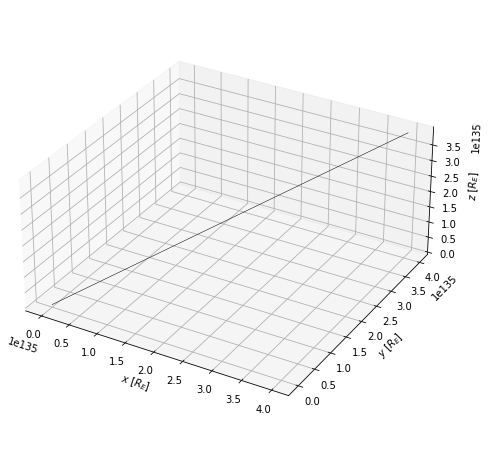

In [59]:
for i in range(0, steps-1):
    
        r = rdat[i]
        v = vdat[i]
        
        tdat[i] = i*dt

        B0 = B(r)
        #B0 = Bdip(r) # my version

        # compute E-field
        r_geo = np.sqrt(np.dot(rdat[i], rdat[i]))*RE
        theta = np.arctan2(rdat[i][0],rdat[i][1])
        
        E = vs_efield(r_geo, theta, kp, gs)
        
        c0 = (dt*q*B0)/(2*m)
        
        # push step 1 - update velocity with half electrostatic contribution
        v1 = v + (q*E*dt)/(2*m)
        
        # push step 2 - rotated via the magnetic field contribution 
        ax = v1 + np.cross(v1,c0)
        bx = (2*c0)/(1+c0**2)
        v2 = v1 + np.cross(ax,bx)
        
        # push step 3 - updated again with another half of the electrostatic push
        vnew = v2 + (q*E*dt)/(2*m)
        
        # update position
        rnew = r + vnew*dt
        
        # append to data arrays
        vdat[i+1] = vnew
        rdat[i+1] = rnew


fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

# plot dipole field data
ax.plot3D(rdat[:,0],rdat[:,1],rdat[:,2],'k',linewidth=0.5)

# plot 3D earth
earth3D(1)

# plot attributes
ax.set_box_aspect([1,1,.5])
ax.set_xlabel("$x$ [$R_E$]")
ax.set_ylabel("$y$ [$R_E$]")
ax.set_zlabel("$z$ [$R_E$]")

plt.show()

In [ ]:
rdat[0][0]

1.0